In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pyarrow

data_path ='../../../Data/eumetnet'

In [2]:
fcs_test = xr.open_dataarray(f'{data_path}/ESSD_benchmark/ESSD_benchmark_test_data_forecasts.nc')
obs_test = xr.open_dataarray(f'{data_path}/ESSD_benchmark/ESSD_benchmark_test_data_observations.nc')

In [3]:
fcs_test

<xarray.DataArray 't2m' (station_id: 229, time: 730, step: 21, number: 51)>
[179039070 values with dtype=float32]
Coordinates: (12/13)
    model_altitude      (station_id) float32 ...
    model_land_usage    (station_id) int8 ...
    model_latitude      (station_id) float64 ...
    model_longitude     (station_id) float64 ...
  * number              (number) int64 0 1 2 3 4 5 6 7 ... 44 45 46 47 48 49 50
    station_altitude    (station_id) float64 ...
    ...                  ...
    station_land_usage  (station_id) int8 ...
    station_latitude    (station_id) float64 ...
    station_longitude   (station_id) float64 ...
    station_name        (station_id) object ...
  * step                (step) timedelta64[ns] 0 days 00:00:00 ... 5 days 00:...
  * time                (time) datetime64[ns] 2017-01-01 ... 2018-12-31
Attributes:
    GRIB_NV:                                  0
    GRIB_Nx:                                  93
    GRIB_Ny:                                  125
    GRIB_cfName:                              unknown
    GRIB_cfVarName:                           t2m
    GRIB_gridDefinitionDescription:           Latitude/Longitude Grid
    GRIB_gridType:                            regular_ll
    GRIB_iDirectionIncrementInDegrees:        0.25
    GRIB_iScansNegatively:                    0
    GRIB_jDirectionIncrementInDegrees:        0.25
    GRIB_jPointsAreConsecutive:               0
    GRIB_jScansPositively:                    0
    GRIB_latitudeOfFirstGridPointInDegrees:   67.0
    GRIB_latitudeOfLastGridPointInDegrees:    36.0
    GRIB_longitudeOfFirstGridPointInDegrees:  -6.0
    GRIB_longitudeOfLastGridPointInDegrees:   17.0
    GRIB_missingValue:                        9999
    GRIB_name:                                2 metre temperature
    GRIB_numberOfPoints:                      11625
    GRIB_paramId:                             167
    GRIB_shortName:                           2t
    GRIB_stepType:                            instant
    GRIB_stepUnits:                           1
    GRIB_totalNumber:                         51
    GRIB_typeOfLevel:                         surface
    GRIB_units:                               K
    coordinates:                              number time step surface latitu...
    long_name:                                2 metre temperature
    standard_name:                            unknown
    units:                                    K
    model altitude source:                    European Union, Copernicus Land...
    land usage source:                        European Union, Copernicus Land...
    land usage legend:                        {1: {'label': '111 - Continuous...

array([0])

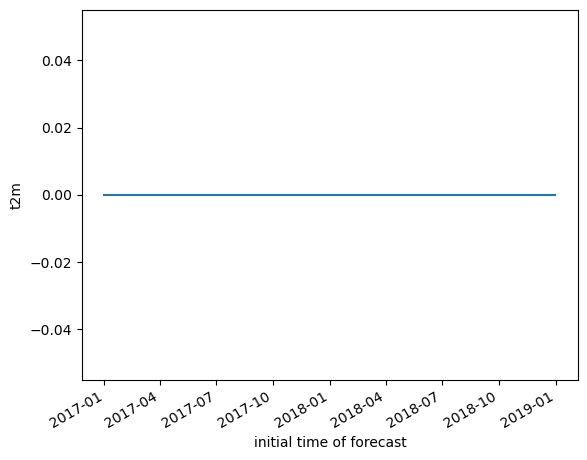

In [4]:
fcs_test.isnull().sum(('station_id','step','number')).plot()
np.unique(fcs_test.isnull().sum(('station_id','step','number')))
#there are no missing values

In [5]:
df_fcs_test = fcs_test.to_dataframe(name = 't2m').reset_index()

In [6]:
df_fcs_test

,station_id,time,step,number,model_altitude,model_land_usage,model_latitude,model_longitude,station_altitude,station_land_usage,station_latitude,station_longitude,station_name,t2m
0,6472,2017-01-01,0 days,0,301.532471,23,50.25,5.25,295.3,12,50.193663,5.255236,Humain,270.048828
1,6472,2017-01-01,0 days,1,301.532471,23,50.25,5.25,295.3,12,50.193663,5.255236,Humain,270.150879
2,6472,2017-01-01,0 days,2,301.532471,23,50.25,5.25,295.3,12,50.193663,5.255236,Humain,269.946777
3,6472,2017-01-01,0 days,3,301.532471,23,50.25,5.25,295.3,12,50.193663,5.255236,Humain,270.111328
4,6472,2017-01-01,0 days,4,301.532471,23,50.25,5.25,295.3,12,50.193663,5.255236,Humain,269.985352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179039065,5906,2018-12-31,5 days,46,102.959984,3,49.50,8.50,98.0,12,49.506200,8.558500,Mannheim,271.922211
179039066,5906,2018-12-31,5 days,47,102.959984,3,49.50,8.50,98.0,12,49.506200,8.558500,Mannheim,275.637665
179039067,5906,2018-12-31,5 days,48,102.959984,3,49.50,8.50,98.0,12,49.506200,8.558500,Mannheim,275.034576
179039068,5906,2018-12-31,5 days,49,102.959984,3,49.50,8.50,98.0,12,49.506200,8.558500,Mannheim,276.737915


### obs

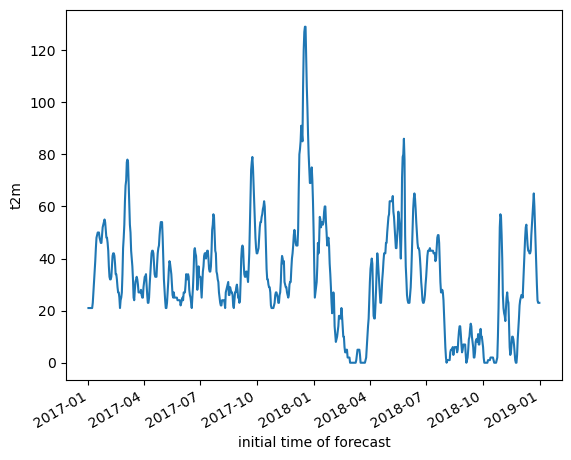

In [7]:
obs_test.isnull().sum(('station_id','step')).plot()
# there are many missing values

In [8]:
df_obs_test = obs_test.to_dataframe('t2m').reset_index()
df_obs_test = df_obs_test.dropna(axis = 0)
df_obs_test = df_obs_test.rename(columns = {'t2m':'obs'})

In [9]:
# takes a few minutes
df_test = pd.merge(df_obs_test, df_fcs_test,on= ['time','step','station_id', 'station_name'], how = 'outer')

In [10]:
df_test

,station_id,time,step,altitude,land_usage,latitude,longitude,station_name,obs,number,model_altitude,model_land_usage,model_latitude,model_longitude,station_altitude,station_land_usage,station_latitude,station_longitude,t2m
0,6472,2017-01-01,0 days 00:00:00,295.3,12.0,50.193663,5.255236,Humain,267.25,0,301.532471,23,50.25,5.25,295.3,12,50.193663,5.255236,270.048828
1,6472,2017-01-01,0 days 00:00:00,295.3,12.0,50.193663,5.255236,Humain,267.25,1,301.532471,23,50.25,5.25,295.3,12,50.193663,5.255236,270.150879
2,6472,2017-01-01,0 days 00:00:00,295.3,12.0,50.193663,5.255236,Humain,267.25,2,301.532471,23,50.25,5.25,295.3,12,50.193663,5.255236,269.946777
3,6472,2017-01-01,0 days 00:00:00,295.3,12.0,50.193663,5.255236,Humain,267.25,3,301.532471,23,50.25,5.25,295.3,12,50.193663,5.255236,270.111328
4,6472,2017-01-01,0 days 00:00:00,295.3,12.0,50.193663,5.255236,Humain,267.25,4,301.532471,23,50.25,5.25,295.3,12,50.193663,5.255236,269.985352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179039065,5906,2018-04-05,0 days 06:00:00,NaN,NaN,NaN,NaN,Mannheim,NaN,46,102.959984,3,49.50,8.50,98.0,12,49.506200,8.558500,282.797363
179039066,5906,2018-04-05,0 days 06:00:00,NaN,NaN,NaN,NaN,Mannheim,NaN,47,102.959984,3,49.50,8.50,98.0,12,49.506200,8.558500,282.696045
179039067,5906,2018-04-05,0 days 06:00:00,NaN,NaN,NaN,NaN,Mannheim,NaN,48,102.959984,3,49.50,8.50,98.0,12,49.506200,8.558500,282.189453
179039068,5906,2018-04-05,0 days 06:00:00,NaN,NaN,NaN,NaN,Mannheim,NaN,49,102.959984,3,49.50,8.50,98.0,12,49.506200,8.558500,282.260986


In [11]:
# takes a few minutes
df_test.to_feather(f'{data_path}/ESSD_benchmark_feather/ESSD_benchmark_test_data.feather')